# An Analysis of Oceanic Measurements & Marine Life
### Group 11:
- Abdullah Albattal
- Li-Yang Chang
- Seyed Omid Hasanli
- Yuchen Zhang

### Notebook Sections:
- <a href='#section1'>Temperature Trends Analysis</a>
- <a href='#section2'>Non-Biological Measurements Analysis</a>
- <a href='#section3'>Biological Measurements Analysis</a>

<a id='section1'></a>
# Temperature Trends Analysis
### Oceanic Surface Temperature Trends plots:
          * Global Temperature Trends
          * Equator Temperature Trends
          * North Sea Temperature Trends
          * California Temperature Trends
        

In [1]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

#%% Reading the surface temperature data
df = pd.read_csv('all_data_depth_0_temp_nan_free_coordinates.csv')

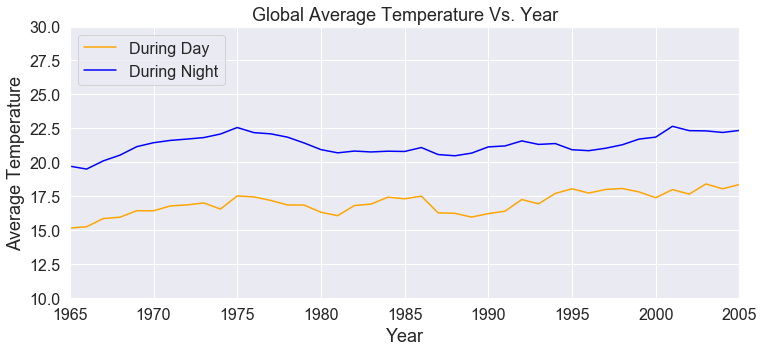

In [2]:
# The number of years a certain coordinate has to be avalable during the period over which we
# analyzing the trends

# That mean if measurments in a certain coordinate is not available for at least num_or_yr_th
# out of all the years we are analyzing, then we do not include it in our measurements
num_or_yr_th = 48

# We will analyze the summer days and nights in the northern hemisphere as they have more data
# points than other locations

# Summer Days
df_lat = df[(df['Year'] < 2010) & (df['Year'] > 1960) &\
            (df['Month'] > 6) & (df['Month'] < 9) & \
            (df['day_night'] == 'd')]\
            .groupby(['Latitude_app','Longitude_app'])['Year'].nunique().to_frame()

df_lat_2 = df_lat[df_lat['Year'] > num_or_yr_th].copy()
coordinate_list = list(df_lat_2.index)

# We need to change the type to string because pandas save tuples as strings in columns
coordinate_list2 = [str(i) for i in coordinate_list]

df_smer_day = df[(df['Month'] > 6) & (df['Month'] < 9) &\
                 (df['day_night'] == 'd') & \
                 (df['coordinates'].isin(coordinate_list2))].copy()


# We reduced the number of nights as they are less present in the dataset
num_or_yr_th = 40
# Summer Nights
df_lat = df[(df['Year'] < 2010) & (df['Year'] > 1960) &\
            (df['Month'] > 6) & (df['Month'] < 9) & \
            (df['day_night'] == 'n')]\
            .groupby(['Latitude_app','Longitude_app'])['Year'].nunique().to_frame()

df_lat_2 = df_lat[df_lat['Year'] > num_or_yr_th].copy()
coordinate_list = list(df_lat_2.index)

# We need to change the type to string because pandas save tuples as strings in columns
coordinate_list2 = [str(i) for i in coordinate_list]

df_smer_nit = df[(df['Month'] > 6) & (df['Month'] < 9) &\
                 (df['day_night'] == 'n') & \
                 (df['coordinates'].isin(coordinate_list2))].copy()


#%% north Hemisphere
df_smer_day_mean = df_smer_day[(df_smer_day['Latitude'] > 0) & (df_smer_day['Latitude'] < 90) &\
                               (df_smer_day['Longitude'] < 180) & (df_smer_day['Longitude'] > - 180)].groupby(['Year']).Temperatur.mean()

df_smer_nit_mean = df_smer_nit[(df_smer_nit['Latitude'] > 0) & (df_smer_nit['Latitude'] < 90) &\
                               (df_smer_nit['Longitude'] < 180) & (df_smer_nit['Longitude'] > - 180)].groupby(['Year']).Temperatur.mean()


# Plotting the rolling average of the temperature trend over the years specified above
g3 = plt.figure(figsize=(12,5))
plt.xlabel('Year', fontsize=18)
plt.ylabel('Average Temperature', fontsize=18)
plt.title('Global Average Temperature Vs. Year', fontsize=18)

ax1 = df_smer_day_mean.rolling(5, center = False).mean().plot(color='orange', grid=True, secondary_y=False, label='During Day')
ax2 = df_smer_nit_mean.rolling(5, center = False).mean().plot(color='blue', grid=True, secondary_y=False, label='During Night')

ax1.tick_params(axis="x", labelsize=16)
ax1.tick_params(axis="y", labelsize=16)

h1, l1 = ax1.get_legend_handles_labels()

ax1.set_xlim(1965,2005)
ax1.set_ylim(10,30)

plt.legend(h1, l1, loc=2, fontsize=16)
plt.show()

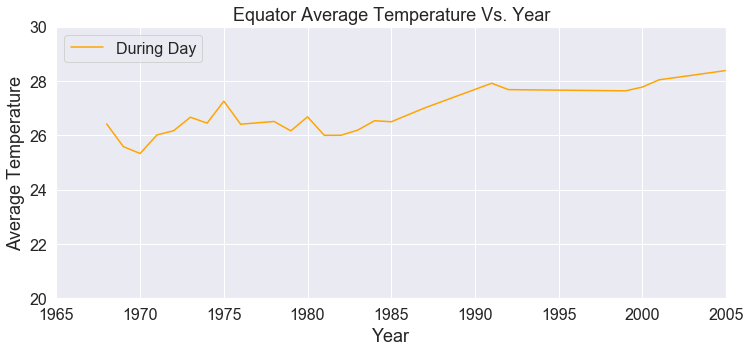

In [6]:
num_or_yr_th = 2

# Summer Days
df_lat = df[(df['Year'] < 2010) & (df['Year'] > 1960) &\
            (df['Month'] > 6) & (df['Month'] < 9) & \
            (df['deep_day_night'] == 'dd')]\
            .groupby(['Latitude_app','Longitude_app'])['Year'].nunique().to_frame()

df_lat_2 = df_lat[df_lat['Year'] > num_or_yr_th].copy()
coordinate_list = list(df_lat_2.index)

# We need to change the type to string because pandas save tuples as strings in columns
coordinate_list2 = [str(i) for i in coordinate_list]

df_smer_day = df[(df['Month'] > 6) & (df['Month'] < 9) &\
                 (df['deep_day_night'] == 'dd') & \
                 (df['coordinates'].isin(coordinate_list2))].copy()

# Summer Nights
df_lat = df_lat = df[(df['Year'] < 2010) & (df['Year'] > 1960) &\
            (df['Month'] > 6) & (df['Month'] < 9) & \
            (df['deep_day_night'] == 'dn')]\
            .groupby(['Latitude_app','Longitude_app'])['Year'].nunique().to_frame()
df_lat_2 = df_lat[df_lat['Year'] > num_or_yr_th].copy()

coordinate_list = list(df_lat_2.index)

# We need to change the type to string because pandas save tuples as strings in columns
coordinate_list2 = [str(i) for i in coordinate_list]

df_smer_nit = df[(df['Month'] > 6) & (df['Month'] < 9) &\
                 (df['deep_day_night'] == 'dn') & \
                 (df['coordinates'].isin(coordinate_list2))].copy()


#%% Equator

# Plotting the rolling average of the temperature trend over the years specified above

df_smer_day_mean = df_smer_day[(df_smer_day['Latitude'] > 0) & (df_smer_day['Latitude'] < 2) &\
                               (df_smer_day['Longitude'] < 180) & (df_smer_day['Longitude'] > - 180)].groupby(['Year']).Temperatur.mean()

g3 = plt.figure(figsize=(12,5))
plt.xlabel('Year', fontsize=18)
plt.ylabel('Average Temperature', fontsize=18)
plt.title('Equator Average Temperature Vs. Year', fontsize=18)

ax1 = df_smer_day_mean.rolling(5, center = False).mean().plot(color='orange', grid=True, secondary_y=False, label='During Day')

ax1.tick_params(axis="x", labelsize=16)
ax1.tick_params(axis="y", labelsize=16)

h1, l1 = ax1.get_legend_handles_labels()

ax1.set_xlim(1965,2005)
ax1.set_ylim(20,30)

plt.legend(h1, l1, loc=2, fontsize=16)
plt.show()

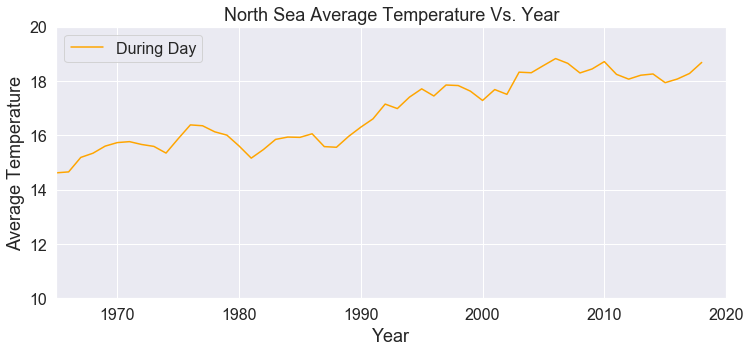

In [7]:
num_or_yr_th = 10

# Summer Days
df_lat = df[(df['Year'] < 2010) & (df['Year'] > 1960) &\
            (df['Month'] > 6) & (df['Month'] < 9) & \
            (df['day_night'] == 'd')]\
            .groupby(['Latitude_app','Longitude_app'])['Year'].nunique().to_frame()

df_lat_2 = df_lat[df_lat['Year'] > num_or_yr_th].copy()
coordinate_list = list(df_lat_2.index)

# We need to change the type to string because pandas save tuples as strings in columns
coordinate_list2 = [str(i) for i in coordinate_list]

df_smer_day = df[(df['Month'] > 6) & (df['Month'] < 9) &\
                 (df['day_night'] == 'd') & \
                 (df['coordinates'].isin(coordinate_list2))].copy()


#%% north sea
df_smer_day_mean = df_smer_day[(df_smer_day['Latitude'] > 50) & (df_smer_day['Latitude'] < 60) &\
                               (df_smer_day['Longitude'] < 25) & (df_smer_day['Longitude'] > - 10)].groupby(['Year']).Temperatur.mean()

# Plotting the rolling average of the temperature trend over the years specified above
g3 = plt.figure(figsize=(12,5))
plt.xlabel('Year', fontsize=18)
plt.ylabel('Average Temperature', fontsize=18)
plt.title('North Sea Average Temperature Vs. Year', fontsize=18)

ax1 = df_smer_day_mean.rolling(5, center = False).mean().plot(color='orange', grid=True, secondary_y=False, label='During Day')

ax1.tick_params(axis="x", labelsize=16)
ax1.tick_params(axis="y", labelsize=16)

h1, l1 = ax1.get_legend_handles_labels()

ax1.set_xlim(1965,2020)
ax1.set_ylim(10,20)

plt.legend(h1, l1, loc=2, fontsize=16)
plt.show()

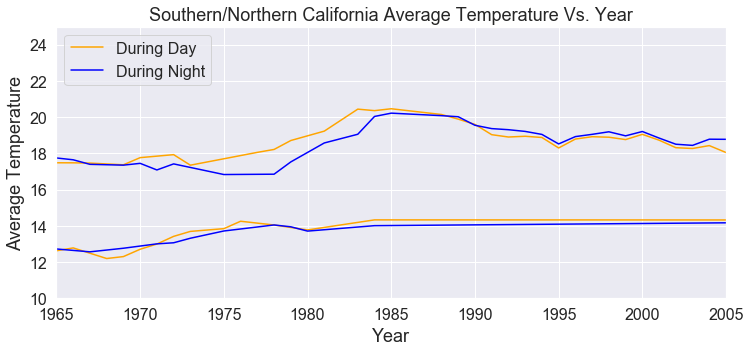

In [5]:
# We are now analyzing deep day (middle of the day) and deep night (middle of the night)
# data for california
# The number of years here is not important for bias as this is a specific location, so we kept it low
num_or_yr_th = 2

# Summer Days
df_lat = df[(df['Year'] < 2010) & (df['Year'] > 1960) &\
            (df['Month'] > 6) & (df['Month'] < 9) & \
            (df['deep_day_night'] == 'dd')]\
            .groupby(['Latitude_app','Longitude_app'])['Year'].nunique().to_frame()

df_lat_2 = df_lat[df_lat['Year'] > num_or_yr_th].copy()
coordinate_list = list(df_lat_2.index)

# We need to change the type to string because pandas save tuples as strings in columns
coordinate_list2 = [str(i) for i in coordinate_list]

df_smer_day = df[(df['Month'] > 6) & (df['Month'] < 9) &\
                 (df['deep_day_night'] == 'dd') & \
                 (df['coordinates'].isin(coordinate_list2))].copy()

# Summer Nights
df_lat = df_lat = df[(df['Year'] < 2010) & (df['Year'] > 1960) &\
            (df['Month'] > 6) & (df['Month'] < 9) & \
            (df['deep_day_night'] == 'dn')]\
            .groupby(['Latitude_app','Longitude_app'])['Year'].nunique().to_frame()
df_lat_2 = df_lat[df_lat['Year'] > num_or_yr_th].copy()

coordinate_list = list(df_lat_2.index)

# We need to change the type to string because pandas save tuples as strings in columns
coordinate_list2 = [str(i) for i in coordinate_list]

df_smer_nit = df[(df['Month'] > 6) & (df['Month'] < 9) &\
                 (df['deep_day_night'] == 'dn') & \
                 (df['coordinates'].isin(coordinate_list2))].copy()


#%% California

# Plotting the rolling average of the temperature trend over the years specified above

df_smer_day_mean = df_smer_day[(df_smer_day['Latitude'] > 31) & (df_smer_day['Latitude'] < 34) &\
                               (df_smer_day['Longitude'] < -115) & (df_smer_day['Longitude'] > - 120)].groupby(['Year']).Temperatur.mean()

df_smer_nit_mean = df_smer_nit[(df_smer_nit['Latitude'] > 31) & (df_smer_nit['Latitude'] < 34) &\
                               (df_smer_nit['Longitude'] < -115) & (df_smer_nit['Longitude'] > - 120)].groupby(['Year']).Temperatur.mean()

df_smer_day_mean1 = df_smer_day[(df_smer_day['Latitude'] > 36) & (df_smer_day['Latitude'] < 40) &\
                               (df_smer_day['Longitude'] < -121) & (df_smer_day['Longitude'] > - 124)].groupby(['Year']).Temperatur.mean()

df_smer_nit_mean1 = df_smer_nit[(df_smer_nit['Latitude'] > 36) & (df_smer_nit['Latitude'] < 40) &\
                               (df_smer_nit['Longitude'] < -121) & (df_smer_nit['Longitude'] > - 124)].groupby(['Year']).Temperatur.mean()



g3 = plt.figure(figsize=(12,5))
plt.xlabel('Year', fontsize=18)
plt.ylabel('Average Temperature', fontsize=18)
plt.title('Southern/Northern California Average Temperature Vs. Year', fontsize=18)

ax1 = df_smer_day_mean.rolling(5, center = False).mean().plot(color='orange', grid=True, secondary_y=False, label='During Day')
ax2 = df_smer_nit_mean.rolling(5, center = False).mean().plot(color='blue', grid=True, secondary_y=False, label='During Night')

ax3 = df_smer_day_mean1.rolling(5, center = False).mean().plot(color='orange', grid=True, secondary_y=False, label='During Day')
ax4 = df_smer_nit_mean1.rolling(5, center = False).mean().plot(color='blue', grid=True, secondary_y=False, label='During Night')

ax1.tick_params(axis="x", labelsize=16)
ax1.tick_params(axis="y", labelsize=16)

#h1, l1 = ax1.get_legend_handles_labels()

ax1.set_xlim(1965,2005)
ax1.set_ylim(10,25)

plt.legend(h1, l1, loc=2, fontsize=16)
plt.show()

<a id='section2'></a>
# Non-Biological Measurements Analysis
### Oceanic Measurements Correlation plots:
          * Nitrate - Oxygen
          * Nitrate - Temperature
          * Oxygen - Temperature
          * pH - Oxygen
          * pH - Temperature
          * Phosphate - Oxygen(depth = 10)
          * Phosphate - Oxygen
          * Phosphate - Temperature

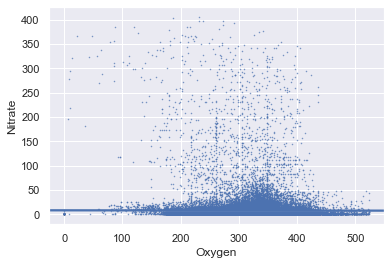

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
df1 = pd.read_csv("cleaned_data_of_the2000s.csv")
df1_0depth = df1[df1.Depth == 0] # only consider 0 depth
clear_df1 = df1_0depth[df1_0depth.Nitrate!= None]
sns.regplot(x="Oxygen", y="Nitrate", data=clear_df1,scatter_kws={'s':0.25})
plt.show()

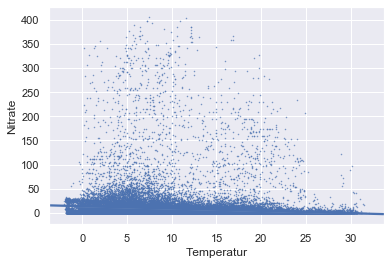

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
df1 = pd.read_csv("cleaned_data_of_the2000s.csv")
df1_0depth = df1[df1.Depth == 0] # only consider 0 depth
clear_df1 = df1_0depth[df1_0depth.Nitrate!= None]
sns.regplot(x="Temperatur", y="Nitrate", data=clear_df1,scatter_kws={'s':0.25})
plt.show()

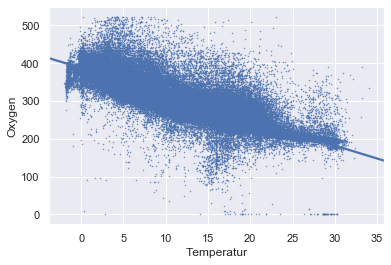

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
df1 = pd.read_csv("cleaned_data_of_the2000s.csv")
df1_0depth = df1[df1.Depth == 0] # only consider 0 depth
clear_df1 = df1_0depth[df1_0depth.Oxygen!= None]
sns.regplot(x="Temperatur", y="Oxygen", data=clear_df1,scatter_kws={'s':0.25})
plt.show()

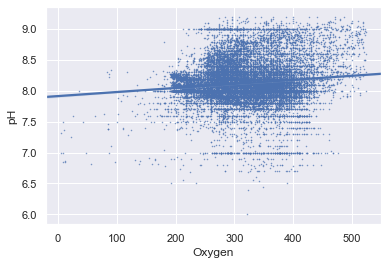

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
df1 = pd.read_csv("cleaned_data_of_the2000s.csv")
df1_0depth = df1[df1.Depth == 0] # only consider 0 depth
clear_df1 = df1_0depth[df1_0depth.pH!= None]
sns.regplot(x="Oxygen", y="pH", data=clear_df1,scatter_kws={'s':0.25})
plt.show()

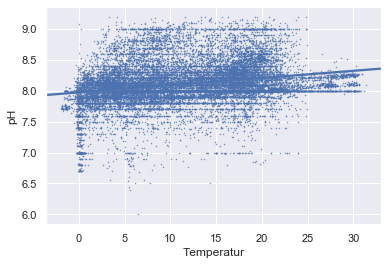

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
df1 = pd.read_csv("cleaned_data_of_the2000s.csv")
df1_0depth = df1[df1.Depth == 0] # only consider 0 depth
clear_df1 = df1_0depth[df1_0depth.pH!= None]
sns.regplot(x="Temperatur", y="pH", data=clear_df1,scatter_kws={'s':0.25})
plt.show()

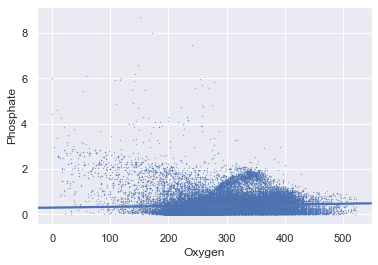

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#using the cleaned data of 2000s
df1 = pd.read_csv("cleaned_data_of_the2000s.csv")
df1_0depth = df1[df1.Depth == 10]
clear_df1 = df1_0depth[df1_0depth.Phosphate!=None]
sns.regplot(x="Oxygen", y="Phosphate", data=clear_df1,scatter_kws={'s':0.1}) #plot the scattering with phosphate vs oxygen
plt.show()

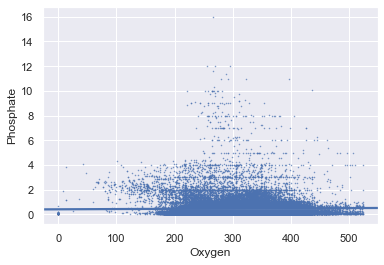

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
df1 = pd.read_csv("cleaned_data_of_the2000s.csv")
df1_0depth = df1[df1.Depth == 0] # only consider 0 depth
clear_df1 = df1_0depth[df1_0depth.Phosphate!= None]
sns.regplot(x="Oxygen", y="Phosphate", data=clear_df1,scatter_kws={'s':0.25})
plt.show()

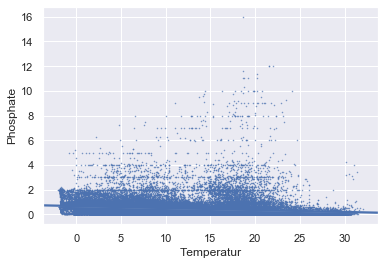

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
df1 = pd.read_csv("cleaned_data_of_the2000s.csv")
df1_0depth = df1[df1.Depth == 0] # only consider 0 depth
clear_df1 = df1_0depth[df1_0depth.Phosphate!= None]
sns.regplot(x="Temperatur", y="Phosphate", data=clear_df1,scatter_kws={'s':0.25})
plt.show()

<a id='section3'></a>
# Biological Measurements Analysis
### Planktons Correlation plots:
          * Wet mass - Tempreture
          * Wet mass - Salinity
          * Wet mass - Oxygen
          * Wet mass - Phosphate
          * Wet mass - pH
          * Wet mass - Nitrate
 ### Jellyfishes Correlation plots:
          * Actual count - Tempreture
          * Actual count - Salinity
          * Actual count - Oxygen
          * Actual count - Phosphate
          * Actual count - pH
          * Actual count - Nitrate

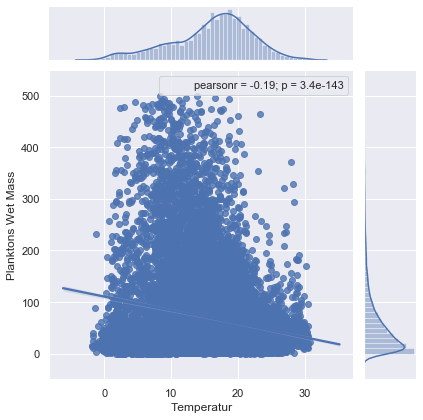

In [16]:
"""
#########################################################################################################################
##Read the bio/none_bio datafile for plankton data and filter them based depth zero and draw a 
## correlation graph Y = Total Wet Mass and X = Temperature
#########################################################################################################################
"""
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
## returning the current working directory
wd = os.getcwd() 
fname =  wd + '/DataFiles/all_bio_geo_merged.csv'
## opening the csv file into a pandas dataframe from current working directory
df = pd.read_csv(fname)
## selecting required columns fro dataframe
d= df[['Temperatur', 'Total Wet Mass','Depth',  'Latitude_x', 'Longitude_x']] 
## filtering data based on depth
d = d[(d['Total Wet Mass'] < 500) &(d['Depth'] == 0)]
## droping all duplicated/NotANumber rows
d = d.drop_duplicates()
d = d.dropna()
sns.set(style='darkgrid')
## plotting correlation plot
g = sns.JointGrid(x="Temperatur", y="Total Wet Mass", data=d)
g = g.plot(sns.regplot, sns.distplot)  
g.annotate(stats.pearsonr)
## setting axis lables
g.set_axis_labels('Temperatur', 'Planktons Wet Mass')
plt.show()

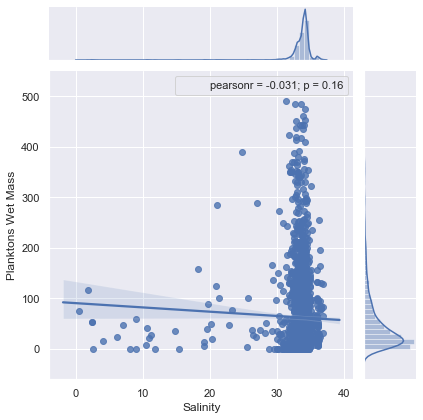

In [15]:
"""
#########################################################################################################################
##Read the bio/none_bio datafile for plankton data and filter them based depth zero and draw a 
## correlation graph Y = Total Wet Mass and X = Salinity
#########################################################################################################################
"""
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
## returning the current working directory
wd = os.getcwd() 
fname =  wd + '/DataFiles/all_bio_geo_merged.csv'
## opening the csv file into a pandas dataframe from current working directory
df = pd.read_csv(fname)
## selecting required columns fro dataframe
d= df[['Salinity', 'Total Wet Mass','Depth',  'Latitude_x', 'Longitude_x']] 
## filtering data based on depth
d = d[(d['Total Wet Mass'] < 500) &(d['Depth'] == 0) & (d['Salinity'] > 0)]
## droping all duplicated/NotANumber rows
d = d.drop_duplicates()
d = d.dropna()
sns.set(style='darkgrid')
## plotting correlation plot
g = sns.JointGrid(x="Salinity", y="Total Wet Mass", data=d)
g = g.plot(sns.regplot, sns.distplot)  
g.annotate(stats.pearsonr)
## setting axis lables
g.set_axis_labels('Salinity', 'Planktons Wet Mass')
plt.show()

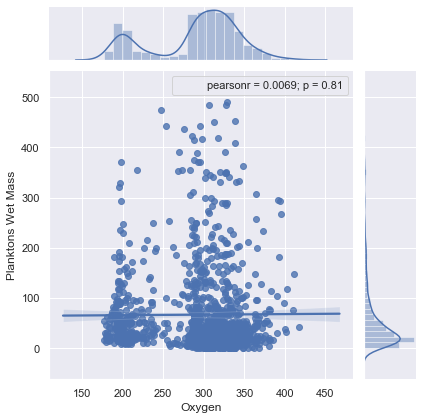

In [14]:
"""
#########################################################################################################################
##Read the bio/none_bio datafile for plankton data and filter them based depth zero and draw a 
## correlation graph Y = Total Wet Mass and X = Oxygen
#########################################################################################################################
"""
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
## returning the current working directory
wd = os.getcwd() 
fname =  wd + '/DataFiles/all_bio_geo_merged.csv'
## opening the csv file into a pandas dataframe from current working directory
df = pd.read_csv(fname)
## selecting required columns fro dataframe
d= df[['Oxygen', 'Total Wet Mass','Depth',  'Latitude_x', 'Longitude_x']] 
## filtering data based on depth
d = d[(d['Total Wet Mass'] < 500) &(d['Depth'] == 0) & (d['Oxygen'] > 0)]
## droping all duplicated/NotANumber rows
d = d.drop_duplicates()
d = d.dropna()
sns.set(style='darkgrid')
## plotting correlation plot
g = sns.JointGrid(x="Oxygen", y="Total Wet Mass", data=d)
g = g.plot(sns.regplot, sns.distplot)  
g.annotate(stats.pearsonr)
## setting axis lables
g.set_axis_labels('Oxygen', 'Planktons Wet Mass')
plt.show()

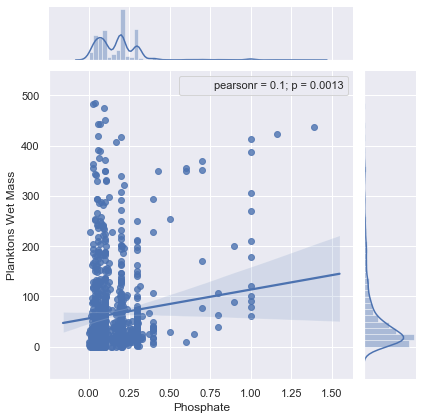

In [13]:
"""
#########################################################################################################################
##Read the bio/none_bio datafile for plankton data and filter them based depth zero and draw a 
## correlation graph Y = Total Wet Mass and X = Phosphate
#########################################################################################################################
"""
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
## returning the current working directory
wd = os.getcwd() 
fname =  wd + '/DataFiles/all_bio_geo_merged.csv'
## opening the csv file into a pandas dataframe from current working directory
df = pd.read_csv(fname)
## selecting required columns fro dataframe
d= df[['Phosphate', 'Total Wet Mass','Depth',  'Latitude_x', 'Longitude_x']] 
## filtering data based on depth
d = d[(d['Total Wet Mass'] < 500) &(d['Depth'] == 0) & (d['Phosphate'] > 0)]
## droping all duplicated/NotANumber rows
d = d.drop_duplicates()
d = d.dropna()
sns.set(style='darkgrid')
## plotting correlation plot
g = sns.JointGrid(x="Phosphate", y="Total Wet Mass", data=d)
g = g.plot(sns.regplot, sns.distplot)  
g.annotate(stats.pearsonr)
## setting axis lables
g.set_axis_labels('Phosphate', 'Planktons Wet Mass')
plt.show()

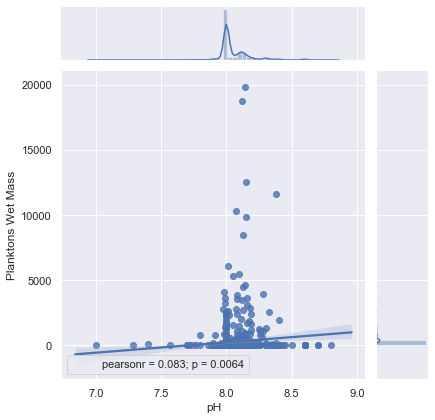

In [12]:
"""
#########################################################################################################################
##Read the bio/none_bio datafile for plankton data and filter them based depth zero and draw a 
## correlation graph Y = Total Wet Mass and X = Nitrate
#########################################################################################################################
"""
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
## returning the current working directory
wd = os.getcwd() 
fname =  wd + '/DataFiles/all_bio_geo_merged.csv'
## opening the csv file into a pandas dataframe from current working directory
df = pd.read_csv(fname)
## selecting required columns fro dataframe
d= df[['pH', 'Total Wet Mass','Depth',  'Latitude_x', 'Longitude_x']] 
## filtering data based on depth
d = d[(d['Depth'] == 0) & (d['pH'] > 0)]
## droping all duplicated/NotANumber rows
d = d.drop_duplicates()
d = d.dropna()
sns.set(style='darkgrid')
## plotting correlation plot
g = sns.JointGrid(x="pH", y="Total Wet Mass", data=d)
g = g.plot(sns.regplot, sns.distplot)  
g.annotate(stats.pearsonr)
## setting axis lables
g.set_axis_labels('pH', 'Planktons Wet Mass')
plt.show()

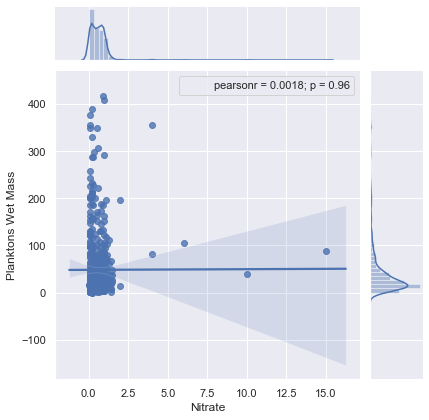

In [11]:
"""
#########################################################################################################################
##Read the bio/none_bio datafile for plankton data and filter them based depth zero and draw a 
## correlation graph Y = Total Wet Mass and X = Nitrate
#########################################################################################################################
"""
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
## returning the current working directory
wd = os.getcwd() 
fname =  wd + '/DataFiles/all_bio_geo_merged.csv'
## opening the csv file into a pandas dataframe from current working directory
df = pd.read_csv(fname)
## selecting required columns fro dataframe
d= df[['Nitrate', 'Total Wet Mass','Depth',  'Latitude_x', 'Longitude_x']] 
## filtering data based on depth
d = d[(d['Total Wet Mass'] < 500) & (d['Depth'] == 0) &(d['Nitrate'] > 0)]
## droping all duplicated/NotANumber rows
d = d.drop_duplicates()
d = d.dropna()
sns.set(style='darkgrid')
## plotting correlation plot
g = sns.JointGrid(x="Nitrate", y="Total Wet Mass", data=d)
g = g.plot(sns.regplot, sns.distplot)  
g.annotate(stats.pearsonr)
## setting axis lables
g.set_axis_labels('Nitrate', 'Planktons Wet Mass')
plt.show()

In [1]:
######################################
# Read ocean and jelly fish data     # 
######################################
def read_ocean_data(fname):
    '''This function read the ckeaned ocean data and extract
       only the surface ones
       fname: data name
    '''
    assert isinstance(fname, str)
    import pandas as pd

    dat = pd.read_csv(fname)
    dat = dat[dat['Depth'] == 0]

    return dat

import pandas as pd
import math 

dat = pd.read_csv('jelly_fish.csv')
dat = dat[(dat['year'] >=1950) & (dat['count_actual'] != 'nd')] 
ocean_dat_2010s = read_ocean_data('cleaned_data_of_the2010s.csv')
ocean_dat_2000s = read_ocean_data('cleaned_data_of_the2000s.csv')
ocean_dat_1990s = read_ocean_data('cleaned_data_of_the1990s.csv')
ocean_dat_1980s = read_ocean_data('cleaned_data_of_the1980s.csv')
ocean_dat_1970s = read_ocean_data('cleaned_data_of_the1970s.csv')
ocean_dat_1960s = read_ocean_data('cleaned_data_of_the1960s.csv')
ocean_dat_1950s = read_ocean_data('cleaned_data_of_the1950s.csv')

C:\Users\sunny\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (7,8,22,23,25,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
##############################################
# split the jellyfish data by decades        #
##############################################
a = []
b = []
c = []
jellyfish_2010s= set()
jellyfish_2000s= set()
jellyfish_1990s= set()
jellyfish_1980s= set()
jellyfish_1970s= set()
jellyfish_1960s= set()
jellyfish_1950s= set()

for i in dat[dat['count_actual']!='nd']['lat']:
    a.append(i)
for i in dat[dat['count_actual']!='nd']['lon']:
    b.append(i)
for i in dat[dat['count_actual']!='nd']['year']:
    c.append(i)
for i in range(len(a)):
    if c[i] >= 2000 and c[i] <= 2009:
        jellyfish_2000s.add((c[i], a[i], b[i]))
    elif c[i] >= 2010 and c[i] <= 2019:
        jellyfish_2010s.add((c[i], a[i], b[i]))
    elif c[i] >= 1990 and c[i] <= 1999:
        jellyfish_1990s.add((c[i], a[i], b[i]))
    elif c[i] >= 1980 and c[i] <= 1989:
        jellyfish_1980s.add((c[i], a[i], b[i]))
    elif c[i] >= 1970 and c[i] <= 1979:
        jellyfish_1970s.add((c[i], a[i], b[i]))
    elif c[i] >= 1960 and c[i] <= 1969:
        jellyfish_1960s.add((c[i], a[i], b[i]))
    elif c[i] >= 1950 and c[i] <= 1959:
        jellyfish_1950s.add((c[i], a[i], b[i]))   

In [4]:
####################################################################################
# This function returns the average count in the jellyfish data and the average of #
# different oceaninc measurement by the same latitude and longitude                #
####################################################################################
def ocean_jellyfish_conbine(jellyfish, ocean_dat, dat, measurement):
    '''This function returns the average count in the jellyfish data and the average
       of different oceaninc measurement by the same latitude and longitude 
       jellyfish: jellyfish data split by dacade
       ocean_data: ocean data
       dat: oringinal jellyfish data
       measurement: measurement name that interested in 
    '''
    import pandas as pd
    assert isinstance(jellyfish, set)
    assert isinstance(ocean_dat, pd.DataFrame)
    assert isinstance(dat, pd.DataFrame)
    assert isinstance(measurement, str)
    ave_count = []
    ave_temp = []

    for i in jellyfish:
        sum_count = 0
        sum_temp = 0
        count_count = 0
        count_temp = 0
        for j in dat[(dat['year'] == i[0]) & (dat['lat'] >= i[1]-0.5) & (dat['lat'] <= i[1] + 0.5)
                    & (dat['lon'] >= i[2] - 0.5)& (dat['lon'] <=  i[2] + 0.5)]['count_actual']:

            sum_count += int(j)
            count_count += 1
        ave_count.append(sum_count/count_count)

        aa =  ocean_dat[(ocean_dat['Year'] == i[0]) & (ocean_dat['Latitude'] >= i[1]-0.5) & (ocean_dat['Latitude'] <= i[1] + 0.5)
                    & (ocean_dat['Longitude'] >= i[2] - 0.5) & (ocean_dat['Longitude'] <=  i[2] + 0.5)][measurement]
        if len(aa) != 0:
            for j in aa:
                if not math.isnan(j):
                    sum_temp += j
                    count_temp += 1
            if count_temp != 0:
                ave_temp.append(sum_temp/count_temp)
            else:
                ave_temp.append(float('nan'))        
        else:
            ave_temp.append(float('nan'))

    return ave_count, ave_temp

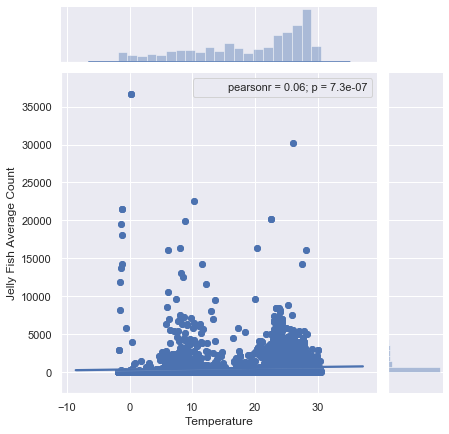

In [8]:
#################################################################
# collect and conbine average temperature and average count for #
# different decades and do the plotting                         #
#################################################################

# collect ave_count and ave_temp
ave_count = []
ave_temp = []

a, b = ocean_jellyfish_conbine(jellyfish_2010s, ocean_dat_2010s, dat, 'Temperatur')
ave_count += a
ave_temp += b

a, b = ocean_jellyfish_conbine(jellyfish_2000s, ocean_dat_2000s, dat, 'Temperatur')
ave_count += a
ave_temp += b

a, b = ocean_jellyfish_conbine(jellyfish_1990s, ocean_dat_1990s, dat, 'Temperatur')
ave_count += a
ave_temp += b

a, b = ocean_jellyfish_conbine(jellyfish_1980s, ocean_dat_1980s, dat, 'Temperatur')
ave_count += a
ave_temp += b

a, b = ocean_jellyfish_conbine(jellyfish_1970s, ocean_dat_1970s, dat, 'Temperatur')
ave_count += a
ave_temp += b

a, b = ocean_jellyfish_conbine(jellyfish_1960s, ocean_dat_1960s, dat, 'Temperatur')
ave_count += a
ave_temp += b

a, b = ocean_jellyfish_conbine(jellyfish_1950s, ocean_dat_1950s, dat, 'Temperatur')
ave_count += a
ave_temp += b
# Remove the outlier 
ave_count_1 = []
ave_temp_1 = []
for i in range(len(ave_temp)):
    if ave_count[i] < 140000:
        ave_count_1.append(ave_count[i])
        ave_temp_1.append(ave_temp[i])
# Scatter plot 
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
sns.set(style = 'darkgrid')
g = sns.jointplot(ave_temp_1, ave_count_1)
g = g.plot(sns.regplot, sns.distplot)
g.set_axis_labels('Temperature', 'Jelly Fish Average Count')
g.annotate(stats.pearsonr)
g.savefig('jellyfish_Temperature.png')
plt.show()

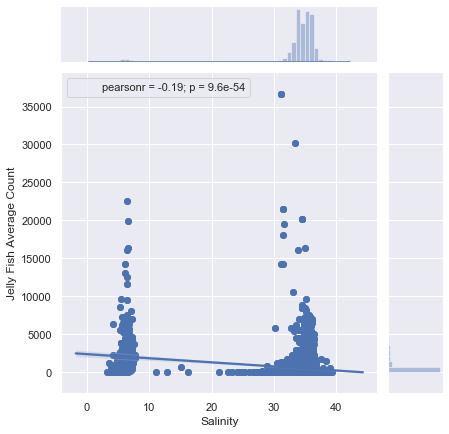

In [9]:
#################################################################
# collect and conbine average salinity and average count for    #
# different decades and do the plotting                         #
#################################################################

# collect ave_salinity and ave_count 
ave_count = []
ave_salinity = []

a, b = ocean_jellyfish_conbine(jellyfish_2010s, ocean_dat_2010s, dat, 'Salinity')
ave_count += a
ave_salinity += b

a, b = ocean_jellyfish_conbine(jellyfish_2000s, ocean_dat_2000s, dat, 'Salinity')
ave_count += a
ave_salinity += b

a, b = ocean_jellyfish_conbine(jellyfish_1990s, ocean_dat_1990s, dat, 'Salinity')
ave_count += a
ave_salinity += b

a, b = ocean_jellyfish_conbine(jellyfish_1980s, ocean_dat_1980s, dat, 'Salinity')
ave_count += a
ave_salinity += b

a, b = ocean_jellyfish_conbine(jellyfish_1970s, ocean_dat_1970s, dat, 'Salinity')
ave_count += a
ave_salinity += b

a, b = ocean_jellyfish_conbine(jellyfish_1960s, ocean_dat_1960s, dat, 'Salinity')
ave_count += a
ave_salinity += b

a, b = ocean_jellyfish_conbine(jellyfish_1950s, ocean_dat_1950s, dat, 'Salinity')
ave_count += a
ave_salinity += b
# Remove the outlier 
ave_count_1 = []
ave_salinity_1 = []
for i in range(len(ave_salinity)):
    if ave_count[i] < 140000:
        ave_count_1.append(ave_count[i])
        ave_salinity_1.append(ave_salinity[i])
# scatter plot 
sns.set(style = 'darkgrid')
g = sns.jointplot(ave_salinity_1, ave_count_1)
g = g.plot(sns.regplot, sns.distplot)
g.set_axis_labels('Salinity', 'Jelly Fish Average Count')
g.annotate(stats.pearsonr)
g.savefig('jellyfish_Salinity.png')

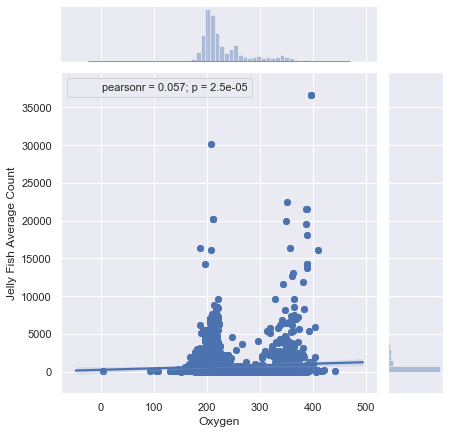

In [10]:
#################################################################
# collect and conbine average oxygen and average count for      #
# different decades and do the plotting                         #
#################################################################

# collect ave_oxygen and ave_count 
ave_count = []
ave_oxygen = []

a, b = ocean_jellyfish_conbine(jellyfish_2010s, ocean_dat_2010s, dat, 'Oxygen')
ave_count += a
ave_oxygen += b

a, b = ocean_jellyfish_conbine(jellyfish_2000s, ocean_dat_2000s, dat, 'Oxygen')
ave_count += a
ave_oxygen += b

a, b = ocean_jellyfish_conbine(jellyfish_1990s, ocean_dat_1990s, dat, 'Oxygen')
ave_count += a
ave_oxygen += b

a, b = ocean_jellyfish_conbine(jellyfish_1980s, ocean_dat_1980s, dat, 'Oxygen')
ave_count += a
ave_oxygen += b

a, b = ocean_jellyfish_conbine(jellyfish_1970s, ocean_dat_1970s, dat, 'Oxygen')
ave_count += a
ave_oxygen += b

a, b = ocean_jellyfish_conbine(jellyfish_1960s, ocean_dat_1960s, dat, 'Oxygen')
ave_count += a
ave_oxygen += b

a, b = ocean_jellyfish_conbine(jellyfish_1950s, ocean_dat_1950s, dat, 'Oxygen')
ave_count += a
ave_oxygen += b
# Remove the outlier 
ave_count_1 = []
ave_oxygen_1 = []
for i in range(len(ave_salinity)):
    if ave_count[i] < 140000:
        ave_count_1.append(ave_count[i])
        ave_oxygen_1.append(ave_oxygen[i])
# scatter plot 
sns.set(style = 'darkgrid')
g = sns.jointplot(ave_oxygen_1, ave_count_1)
g = g.plot(sns.regplot, sns.distplot)
g.set_axis_labels('Oxygen', 'Jelly Fish Average Count')
g.annotate(stats.pearsonr)
g.savefig('jellyfish_Oxygen.png')
plt.show()

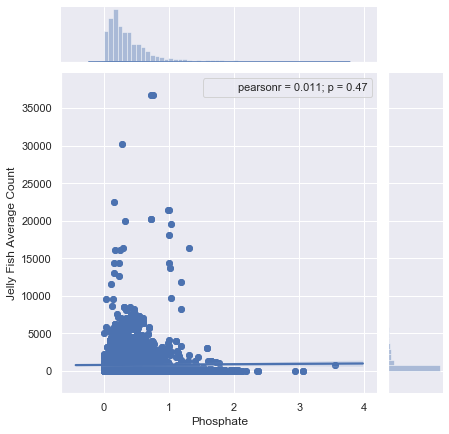

In [11]:
#################################################################
# collect and conbine average phosphate and average count for   #
# different decades and do the plotting                         #
#################################################################

# collect ave_phos and ave_count 
ave_count = []
ave_phos = []

a, b = ocean_jellyfish_conbine(jellyfish_2010s, ocean_dat_2010s, dat, 'Phosphate')
ave_count += a
ave_phos += b

a, b = ocean_jellyfish_conbine(jellyfish_2000s, ocean_dat_2000s, dat, 'Phosphate')
ave_count += a
ave_phos += b

a, b = ocean_jellyfish_conbine(jellyfish_1990s, ocean_dat_1990s, dat, 'Phosphate')
ave_count += a
ave_phos += b

a, b = ocean_jellyfish_conbine(jellyfish_1980s, ocean_dat_1980s, dat, 'Phosphate')
ave_count += a
ave_phos += b

a, b = ocean_jellyfish_conbine(jellyfish_1970s, ocean_dat_1970s, dat, 'Phosphate')
ave_count += a
ave_phos += b

a, b = ocean_jellyfish_conbine(jellyfish_1960s, ocean_dat_1960s, dat, 'Phosphate')
ave_count += a
ave_phos += b

a, b = ocean_jellyfish_conbine(jellyfish_1950s, ocean_dat_1950s, dat, 'Phosphate')
ave_count += a
ave_phos += b
# Remove the outlier 
ave_count_1 = []
ave_phos_1 = []
for i in range(len(ave_phos)):
    if ave_count[i] < 140000:
        ave_count_1.append(ave_count[i])
        ave_phos_1.append(ave_phos[i])
# scatter plot 
sns.set(style = 'darkgrid')
g = sns.jointplot(ave_phos_1, ave_count_1)
g = g.plot(sns.regplot, sns.distplot)
g.set_axis_labels('Phosphate', 'Jelly Fish Average Count')
g.annotate(stats.pearsonr)
g.savefig('jellyfish_Phosphate.png')
plt.show()

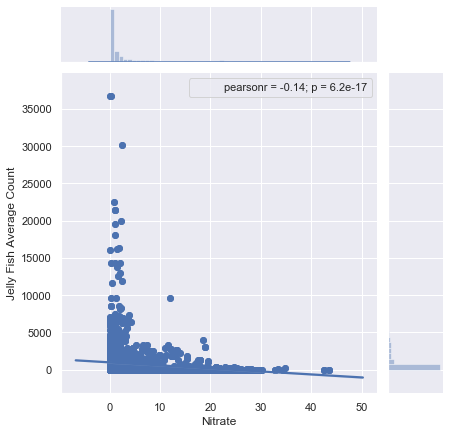

In [12]:
#################################################################
# collect and conbine average nitrate and average count for     #
# different decades and do the plotting                         #
#################################################################

# collect ave_nitrate and ave_count 
ave_count = []
ave_nitrate = []

a, b = ocean_jellyfish_conbine(jellyfish_2010s, ocean_dat_2010s, dat, 'Nitrate')
ave_count += a
ave_nitrate += b

a, b = ocean_jellyfish_conbine(jellyfish_2000s, ocean_dat_2000s, dat, 'Nitrate')
ave_count += a
ave_nitrate += b

a, b = ocean_jellyfish_conbine(jellyfish_1990s, ocean_dat_1990s, dat, 'Nitrate')
ave_count += a
ave_nitrate += b

a, b = ocean_jellyfish_conbine(jellyfish_1980s, ocean_dat_1980s, dat, 'Nitrate')
ave_count += a
ave_nitrate += b

a, b = ocean_jellyfish_conbine(jellyfish_1970s, ocean_dat_1970s, dat, 'Nitrate')
ave_count += a
ave_nitrate += b

a, b = ocean_jellyfish_conbine(jellyfish_1960s, ocean_dat_1960s, dat, 'Nitrate')
ave_count += a
ave_nitrate += b

a, b = ocean_jellyfish_conbine(jellyfish_1950s, ocean_dat_1950s, dat, 'Nitrate')
ave_count += a
ave_nitrate += b
# Remove the outlier 
ave_count_1 = []
ave_nitrate_1 = []
for i in range(len(ave_nitrate)):
    if ave_count[i] < 140000:
        ave_count_1.append(ave_count[i])
        ave_nitrate_1.append(ave_nitrate[i])
# scatter plot 
sns.set(style = 'darkgrid')
g = sns.jointplot(ave_nitrate_1, ave_count_1)
g = g.plot(sns.regplot, sns.distplot)
g.set_axis_labels('Nitrate', 'Jelly Fish Average Count')
g.annotate(stats.pearsonr)
g.savefig('jellyfish_Nitrate.png')
plt.show()

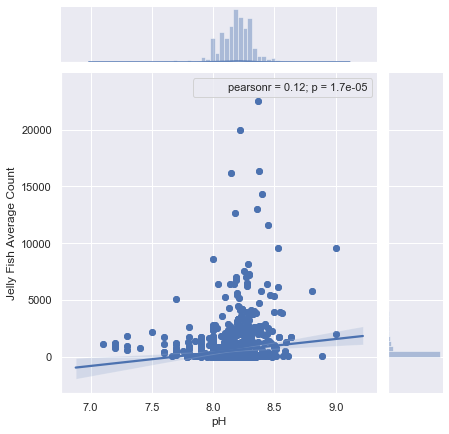

In [13]:
#################################################################
# collect and conbine average pH and average count for          #
# different decades and do the plotting                         #
#################################################################

# collect ave_pH and ave_count 
ave_count = []
ave_pH = []

a, b = ocean_jellyfish_conbine(jellyfish_2010s, ocean_dat_2010s, dat, 'pH')
ave_count += a
ave_pH += b

a, b = ocean_jellyfish_conbine(jellyfish_2000s, ocean_dat_2000s, dat, 'pH')
ave_count += a
ave_pH += b

a, b = ocean_jellyfish_conbine(jellyfish_1990s, ocean_dat_1990s, dat, 'pH')
ave_count += a
ave_pH += b

a, b = ocean_jellyfish_conbine(jellyfish_1980s, ocean_dat_1980s, dat, 'pH')
ave_count += a
ave_pH += b

a, b = ocean_jellyfish_conbine(jellyfish_1970s, ocean_dat_1970s, dat, 'pH')
ave_count += a
ave_pH += b

a, b = ocean_jellyfish_conbine(jellyfish_1960s, ocean_dat_1960s, dat, 'pH')
ave_count += a
ave_pH += b

a, b = ocean_jellyfish_conbine(jellyfish_1950s, ocean_dat_1950s, dat, 'pH')
ave_count += a
ave_pH += b
# Remove the outlier 
ave_count_1 = []
ave_pH_1 = []
for i in range(len(ave_pH)):
    if ave_count[i] < 140000:
        ave_count_1.append(ave_count[i])
        ave_pH_1.append(ave_pH[i])
# scatter plot 
sns.set(style = 'darkgrid')
g = sns.jointplot(ave_pH_1, ave_count_1)
g = g.plot(sns.regplot, sns.distplot)
g.set_axis_labels('pH', 'Jelly Fish Average Count')
g.annotate(stats.pearsonr)
g.savefig('jellyfish_pH.png')
plt.show()